# Predicción de Calidad del Vino (Core)


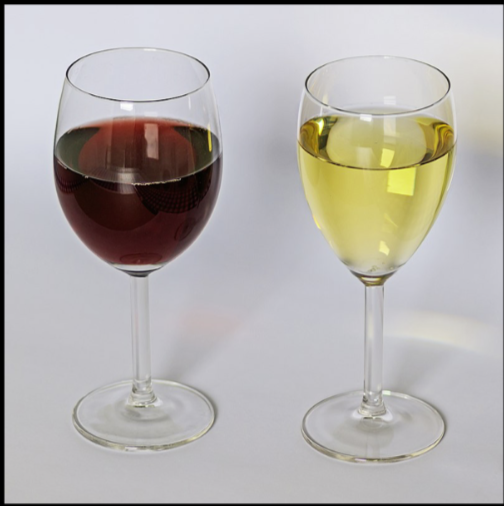

In [241]:
from IPython.display import Image
Image(filename='/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Clases Bootcamp/Machine Learning/Teorías/Foto11.png')

Objetivo

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

Dataset: Wine Quality Dataset

Descripción del Dataset: Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

Instrucciones:

 1. Carga y Exploración de Datos:

- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.
 2. Preprocesamiento de Datos:

- Seleccionar características importantes para la clasificación.
- Transformar variables categóricas en variables numéricas si es necesario.
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Escalar las características.
 3. Entrenamiento de Modelos de Clasificación:

- Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
- Utilizar validación cruzada para seleccionar los mejores hiperparámetros.
 4. Evaluación de Modelos:

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
- Generar un informe de clasificación para cada modelo.
- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.
 5. Análisis y Comparación de Resultados:

- Comparar el rendimiento de los diferentes modelos.
- Discutir cuál modelo ofrece el mejor rendimiento y por qué.
- Identificar las fortalezas y debilidades de cada enfoque en este contexto.
 6. Repositorio en GitHub:

- Crear un repositorio en GitHub con el código y los resultados del análisis.
- Crear un tag de liberación con una breve descripción de la versión final del proyecto.

Adicional:

- Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
- Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.

Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

In [242]:
# Primero empezaré com el análisis de los datos
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/WineQT.csv')
print(df.head()) #Para ver si está todo bien cargado

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [243]:
print(df.info()) #Analizo los valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [244]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [245]:
print(df.dtypes) #Para ver los tipos de datos que tenemos

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [246]:
#Por lo que puedo ver están bien los datos y no tenemos valores nulos.. veremos duplicados
print(df.duplicated().sum())

0


In [247]:
#No tenemos duplicados, por ahora todo perfecto.
#Ahora vamos a ver si tenemos outliers
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.box(df, y='quality')
fig.show()

In [248]:
#Haré gráficos para ver como se comportan los datos
fig = px.histogram(df, x='pH')
fig.show()

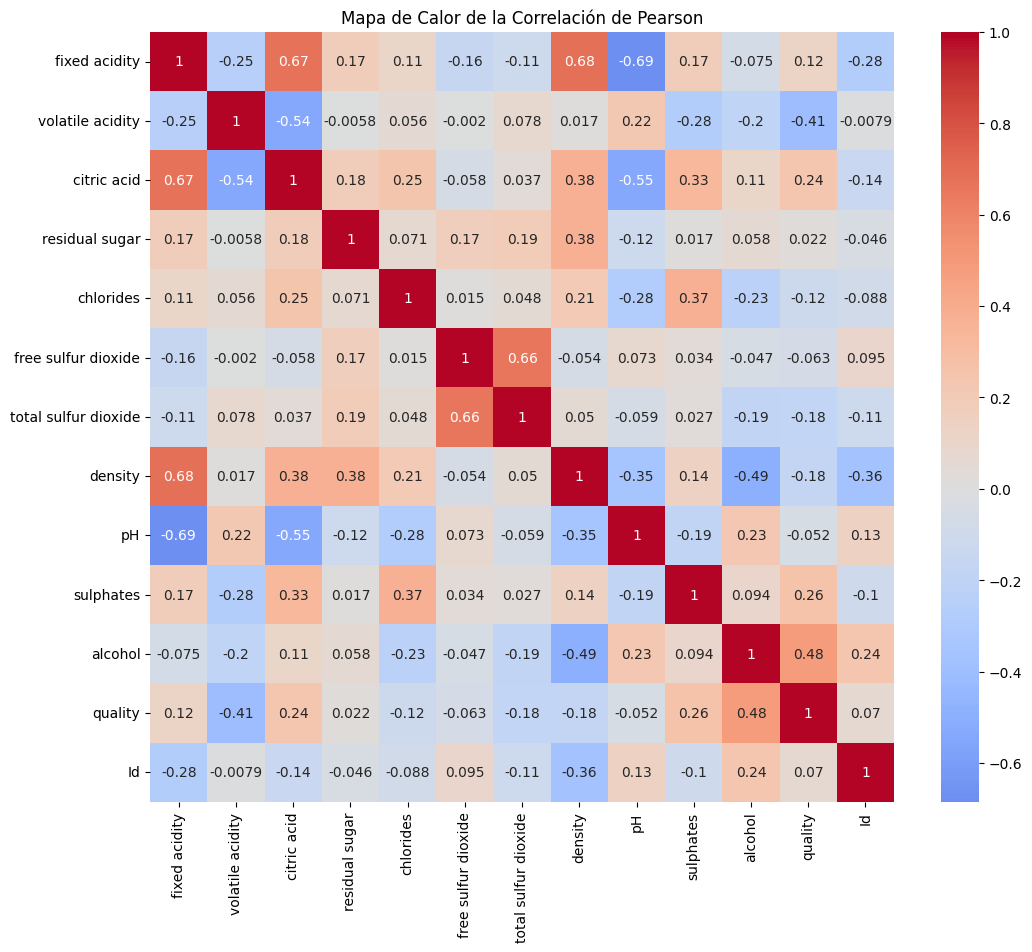

In [249]:
#Haré una correlación para ver cuales son los más influyentes para 'quality'
correlation_matrix = df.corr(method = 'pearson')
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Mapa de Calor de la Correlación de Pearson')
plt.show()

In [250]:
#Empezaremos el preprocesamiento manteniendo todas las columnas excepto ID y analizaré el rendimiento
#Si veo que es muy bajo veo para eliminar algunas columnas
df = df.drop(['Id'], axis = 1)
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [251]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['quality']) #Con esto selecciono todas las columnas, excepto quality
y = df['quality'] #Esta es mi variable objetivo

#Ahora divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Divido las características numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))]))])

In [252]:
#Ahora empiezo con los modelos predictivos
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio LinearRegression: {mse}')
print(f'R-cuadrado LinearRegression: {r2}')

#Voy con otro modelo ahora
#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Random Forest: {mse}')
print(f'R-cuadrado Random Forest: {r2}')

Error Cuadrático Medio LinearRegression: 0.38003245026277527
R-cuadrado LinearRegression: 0.3170693672733127
Error Cuadrático Medio Random Forest: 0.2977768558951965
R-cuadrado Random Forest: 0.46488533685148403


In [253]:
#En esto tenemos que el RandomForest es el mejor para este caso porque presenta unos mejores
#resultados, pero trataremos de mejorarlo
#KNN

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

Error Cuadrático Medio KNN: 0.38270742358078597
R-cuadrado KNN: 0.31226235350558607


In [254]:
#Sigue siendo Random Forest el mejor
#Utilizaré validación cruzada para seleccionar los mehores hiperparámetros
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 15


In [255]:
#Ahora voy a probar el modelo con la mejor k
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=15))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

Error Cuadrático Medio KNN: 0.3470742358078603
R-cuadrado KNN: 0.37629634706325843


In [256]:
#Haré el árbol de decisión 
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Decision Tree: {mse}')
print(f'R-cuadrado Decision Tree: {r2}')

Error Cuadrático Medio Decision Tree: 0.6244541484716157
R-cuadrado Decision Tree: -0.12216434788568242


In [257]:
#Sigue siendo RandomForest el mejor
#Trataré de mejorar el modelo eliminando algunas columnas primeramente 
df2 = df.drop(columns = ['residual sugar', 'free sulfur dioxide', 'pH'])

#Ahora hago todo de nuevo
X = df2.drop(columns=['quality']) #Con esto selecciono todas las columnas, excepto quality
y = df2['quality'] #Esta es mi variable objetivo

#Ahora divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Divido las características numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

#Ahora empiezo con los modelos predictivos
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio LinearRegression: {mse}')
print(f'R-cuadrado LinearRegression: {r2}')

#Voy con otro modelo ahora
#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Random Forest: {mse}')
print(f'R-cuadrado Random Forest: {r2}')

#KNN

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Error Cuadrático Medio LinearRegression: 0.3859386469137911
R-cuadrado LinearRegression: 0.3064557404288223
Error Cuadrático Medio Random Forest: 0.30603537117903934
R-cuadrado Random Forest: 0.45004451716811755
Error Cuadrático Medio KNN: 0.3694323144104803
R-cuadrado KNN: 0.3361181550270719
Mejor valor de K: 8


In [258]:
#Ahora voy a probar el modelo con la mejor k
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=8))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

#Haré el árbol de decisión 
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Decision Tree: {mse}')
print(f'R-cuadrado Decision Tree: {r2}')

Error Cuadrático Medio KNN: 0.3728165938864629
R-cuadrado KNN: 0.33003649509971933
Error Cuadrático Medio Decision Tree: 0.6637554585152838
R-cuadrado Decision Tree: -0.19279007607429177


In [259]:
#No consigo mejorar mucho haciendo esto, probaré eliminando outliers
fig = px.box(df2, y='fixed acidity')
fig.show()

In [260]:
df2 = df2[(df2['fixed acidity'] >= 4.6) & (df2['fixed acidity'] <= 12)]
fig = px.box(df2, y='volatile acidity')
fig.show()

In [261]:
df2 = df2[(df2['volatile acidity'] >= 0.12) & (df2['volatile acidity'] <= 1.005)]
fig = px.box(df2, y='citric acid')
fig.show()

In [262]:
df2 = df2[(df2['citric acid'] >= 0) & (df2['citric acid'] <= 0.76)]
fig = px.box(df2, y='chlorides')
fig.show()

In [263]:
#Estos son demasiados outliers, eliminaré demasiado datos si los elimino
#Eliminaré solo los que están muy fuera
df2 = df2[(df2['chlorides'] >= 0.012) & (df2['chlorides'] < 0.332)]
fig = px.box(df2, y='total sulfur dioxide')
fig.show()

In [264]:
#Eliminaré solo los que están muy fuera
df2 = df2[(df2['total sulfur dioxide'] >= 6) & (df2['total sulfur dioxide'] < 165)]
fig = px.box(df2, y='density')
fig.show()

In [265]:
#Eliminaré solo los que están muy fuera
df2 = df2[(df2['density'] >= 0.99154) & (df2['density'] < 1.001)]
fig = px.box(df2, y='sulphates')
fig.show()

In [266]:
#Eliminaré solo los que están muy fuera
df2 = df2[(df2['sulphates'] >= 0.33) & (df2['sulphates'] < 1.36)]
fig = px.box(df2, y='alcohol')
fig.show()

In [267]:
df2 = df2[(df2['alcohol'] >= 8.5) & (df2['alcohol'] <= 13.4)]
#Ahora vuelvo a hacer la prediccion
X = df2.drop(columns=['quality']) #Con esto selecciono todas las columnas, excepto quality
y = df2['quality'] #Esta es mi variable objetivo

#Ahora divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Divido las características numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

#Ahora empiezo con los modelos predictivos
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio LinearRegression: {mse}')
print(f'R-cuadrado LinearRegression: {r2}')

#Voy con otro modelo ahora
#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Random Forest: {mse}')
print(f'R-cuadrado Random Forest: {r2}')

#KNN

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Error Cuadrático Medio LinearRegression: 0.37356366980422245
R-cuadrado LinearRegression: 0.4571011502021054
Error Cuadrático Medio Random Forest: 0.32826425120772945
R-cuadrado Random Forest: 0.522934645909646
Error Cuadrático Medio KNN: 0.4195169082125604
R-cuadrado KNN: 0.3903174603174604
Mejor valor de K: 16


In [268]:
#Ahora voy a probar el modelo con la mejor k
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=16))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio KNN: {mse}')
print(f'R-cuadrado KNN: {r2}')

#Haré el árbol de decisión 
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio Decision Tree: {mse}')
print(f'R-cuadrado Decision Tree: {r2}')

Error Cuadrático Medio KNN: 0.3656778381642512
R-cuadrado KNN: 0.4685616033272284
Error Cuadrático Medio Decision Tree: 0.5169082125603864
R-cuadrado Decision Tree: 0.2487789987789989


In [269]:
# Eliminar los outliers empeoró la predicción, así que me quedo con los outliers y elijo la mejor
#que fue el randomForest del primer Dataset
#Convertiré quality a una variable categórica
df['quality'] = df['quality'].apply(lambda x: 1 if x >=6 else 0)

#Con esto decimos que más o igual a 6 es alta calidad y menos es de baja calidad
#Redefino los conjuntos de entrenamiento y prueba
X = df.drop(columns=['quality'])
y = df['quality']

print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Ya se que el random Forest es el mejor, usaré RandomForestClassifier

num_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

rf_pipeline_best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

rf_pipeline_best_model.fit(X_train, y_train)
y_pred = rf_pipeline_best_model.predict(X_test)

#Ahora los evalúo en los modelos de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_rf = rf_pipeline_best_model.predict(X_test)

#Calculo las metricas de clasificación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

#Generar el informe de clasificacion
report = classification_report(y_test, y_pred_rf)
print(report)

#Hago la matriz de confusión
print(f'La matriz de confusión para Random Forest es:')
print(confusion_matrix(y_test, y_pred_rf))



quality
1    621
0    522
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       102
           1       0.80      0.78      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

La matriz de confusión para Random Forest es:
[[78 24]
 [28 99]]
